###### 2. Open your files with a text edtior and take a look:
gdp_percapita:
year = yyyy
4 columns
7177 rows
values are decimal format 
there are countries, grouped areas categories , and grouped income level categories in the countries column
unclear whether some names are countries or areas
some issues with symbols in country names

internet_use:
year = yyyy
4 columns
4687 lines, with a blank line 4688 at the end
value = percentages? nn.upto10places
footnotes are inserted as rows at bottom of table, starting at line 4498 with headers for the footnotes
Issues with footnote formatting due to spaces or returns:
at 4502 completes on 4503
at 4627 completes on 4528
at 4586 completes on 4688
at 4628 completes on 4629
at 4659 completes on 4662
at 4668 completes on 4669
Some footnotes have periods, some don't
Some have + signs

Import the required packages with their customary aliases as follows:

`import pandas as pd`   
`import numpy as np`  
`import matplotlib.pyplot as plt`  
`import seaborn as sns`

In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape

(7176, 4)

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


There are 7176 rows and 4 columns in gdp_gf.  Datatypes of columns are: 'Country or Area' = object (string); 'Year' = integer; 'Value' = float (decimal); 'Value Footnotes' = float (decimal).  There are no null values except in Value Footnotes, which are all null.

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df1 = gdp_df.drop(columns = 'Value Footnotes')

In [7]:
gdp_df1 = gdp_df1.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df1

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


7. a. How many countries have data for all years? 

There are 31 distinct years of data from 2020 to 1990.  205 of those countries have data for all 31 years.  See below.

In [8]:
gdp_df1.Year.value_counts()[gdp_df1.Year.unique()]

2020    240
2019    241
2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

In [9]:
len(gdp_df1.Year.value_counts())

31

In [10]:
gdp_df1['Country'].value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [11]:
country_cnt_df = gdp_df1['Country'].value_counts().to_frame().reset_index()
country_cnt_df

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [12]:
country_cnt_df.columns = ['Country','Years']
country_cnt_df

,Country,Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [13]:
country_cnt_df.loc[country_cnt_df.Years == 31]

,Country,Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


Another pathway to the solution:

In [14]:
gdp_df1.Country.value_counts().loc[lambda x : x>30]

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
IDA only                                        31
Fragile and conflict affected situations        31
Ireland                                         31
France                                          31
Italy                                           31
Name: Country, Length: 205, dtype: int64

In [15]:
country_cnt2_df = gdp_df1.Country.value_counts().loc[lambda x : x>30].to_frame().reset_index()
country_cnt2_df

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [16]:
country_cnt2_df.columns = ['Country','Years']
country_cnt2_df

,Country,Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [17]:
country_cnt2_df.loc[country_cnt2_df.Years == 31]

,Country,Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


7b. Which countries are missing many years of data?  There are 37 countries are missing data.  See below for a top 10 list of those missing the most data.

In [18]:
all_missing = country_cnt_df.loc[country_cnt_df.Years < 31]
all_missing

,Country,Years
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


In [19]:
len(all_missing.loc[all_missing.Years < 31])

37

7b. Which countries are missing many years of data? 
The top 10 missing many years of data are : Dijbouti, Somalia, Turks and Caicos Islands, Sint Maarten (Dutch part), Kosovo, Cayman Islands, Nauru, Afghanistan, São Tomé and Príncipe, and Qatar.
*Perhaps related to the time they joined the U.N. https://www.un.org/en/about-us/growth-in-un-membership

In [20]:
most_data_missing = country_cnt_df.loc[country_cnt_df.Years < 31]

In [21]:
most_data_missing.sort_values(by = 'Years', ascending = True).head(10)

,Country,Years
241,Djibouti,8
240,Somalia,8
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
237,Kosovo,13
236,Cayman Islands,15
235,Nauru,17
234,Afghanistan,19
233,SÃ£o TomÃ© and Principe,20
231,Qatar,21


7c. Look at the number of observations per year. What do you notice?
The number of observations was gradually increasing, then tapers off and has begun to decrease.
Perhaps this has to do with the fact that the last countries to join the UN were in 2011, and perhaps due to the fact that several groupings are included in this set, and those groupings may have changed or been modified over time.  https://www.infoplease.com/diplomacy/un/members-united-nations#:~:text=South%20Sudan%20%2D%202011,it%20became%20independent%20from%20Sudan. 
There are currently 193 member states  https://www.un.org/en/about-us

In [22]:
gdp_df1.Year.value_counts()[gdp_df1.Year.unique()]

2020    240
2019    241
2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot.

In [23]:
sns.__version__

'0.11.2'

In [24]:
year_2020_df = gdp_df1[gdp_df1.Year == 2020]
year_2020_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [25]:
year2020_df = year_2020_df.drop(columns = ['Year'])
year2020_df

,Country,GDP_Per_Capita
0,Afghanistan,1970.560169
19,Africa Eastern and Southern,3491.978104
50,Africa Western and Central,4021.293919
81,Albania,13253.733337
112,Algeria,10735.382539
...,...,...
7025,Vietnam,10338.270543
7056,West Bank and Gaza,5402.538773
7083,World,16269.969854
7114,Zambia,3277.816510


In [26]:
df = year2020_df

In [27]:
minvalue = df['GDP_Per_Capita'].min()
minvalue

731.064073644609

In [28]:
maxvalue = df['GDP_Per_Capita'].max()
maxvalue

112557.309471818

In [29]:
sns.set_style("darkgrid")

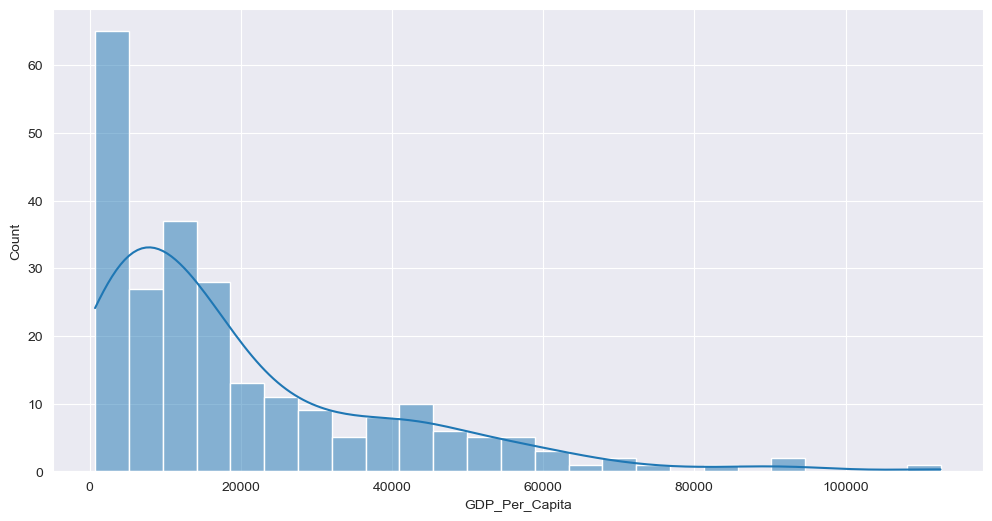

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=year2020_df, x="GDP_Per_Capita", bins=25, kde=True)
plt.show()

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

What range do the observations cover?
What is their central tendency?
Are they heavily skewed in one direction?
Is there evidence for bimodality?
Are there significant outliers?
Do the answers to these questions vary across subsets defined by other variables?

Choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the binwidth parameter:

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

binwidth=n -- ask about this

Common Mistakes
Play with the bin size, it can give different insight.
Don't show the distribution of more than ~5 variables. Use violin or ridgeline plot instead.
Avoid filling with color palettes.

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

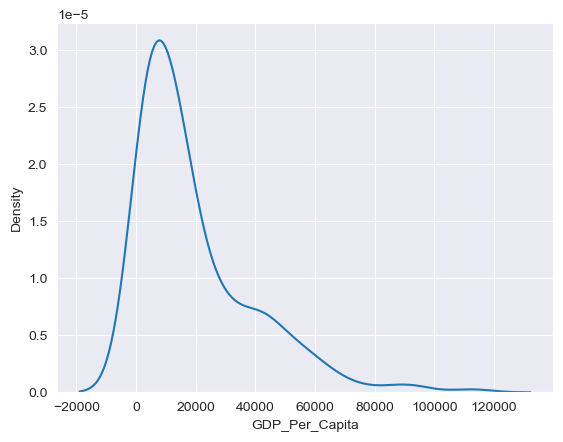

In [31]:
sns.kdeplot(df['GDP_Per_Capita'])

A density plot shows the distribution of a numeric variable. It takes only numeric variables as input and is very close from an histogram. It can be used in the same exact condition.

Common Mistakes
Play with the bandwith of your density function.
Don't show the distribution of more than ~5 variables. Use Violin or Ridge line plot instead.
Avoid filling with color palettes.

<AxesSubplot:ylabel='GDP_Per_Capita'>

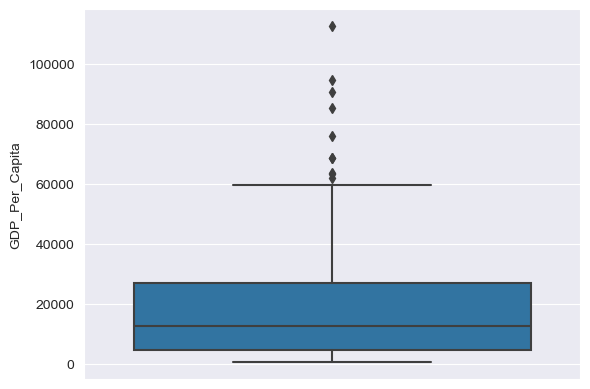

In [32]:
sns.boxplot(y=df["GDP_Per_Capita"])

BOXPLOT: The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

Common Mistakes
Boxplot hides the sample size of each group, show it with annotation or box width.
Boxplot hides the underlying distribution. Use jitter if low number of data points, or use violin with bigger data.
Order your boxplot by median can make it more insightful.

<AxesSubplot:ylabel='GDP_Per_Capita'>

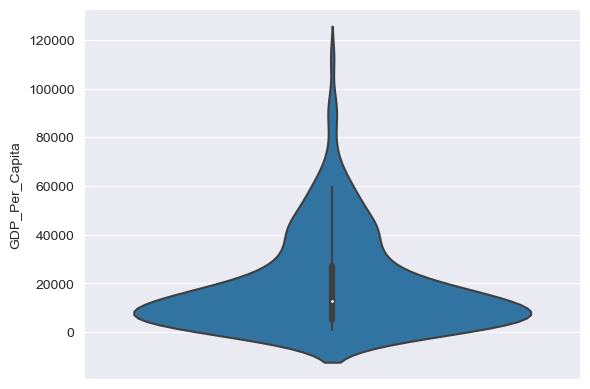

In [33]:
sns.violinplot(y=df["GDP_Per_Capita"])

Violinplots allow to visualize the distribution of a numeric variable for one or several groups. It is really close from a boxplot, but allows a deeper understanding of the distribution.

Violins are particularly adapted when the amount of data is huge and showing individual observations gets impossible.

Common Mistakes
If you have just a few groups, you are probably interested by ridgeline charts.
If you compare groups with very different sample size, show it.
Ordering groups by median value makes the chart more insightful.

8a. What do you notice when you look at these plots? 

The greatest distribution of GDP per capita is less than 10k.  

8b.How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

The density plot and the violin plot with just one variable present look like they have negative values due to [Gaussian distribution?]
The histogram shows the distribution of GDP most distinctly due to the option of binning the data into even smaller groups, but the violin plot allows us to see the actual point of GDP per capita for each country.

9. What was the median GDP per capita value in 2020?  12908.94

In [34]:
round(year2020_df.GDP_Per_Capita.median(), 2)

12908.94

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. 

In [35]:
gdp_df1

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [36]:
gdp_decades = gdp_df1[(gdp_df1["Year"] == 1990) | (gdp_df1["Year"] == 2000) | (gdp_df1["Year"] == 2010) | (gdp_df1["Year"] == 2020)]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [37]:
df = gdp_decades
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

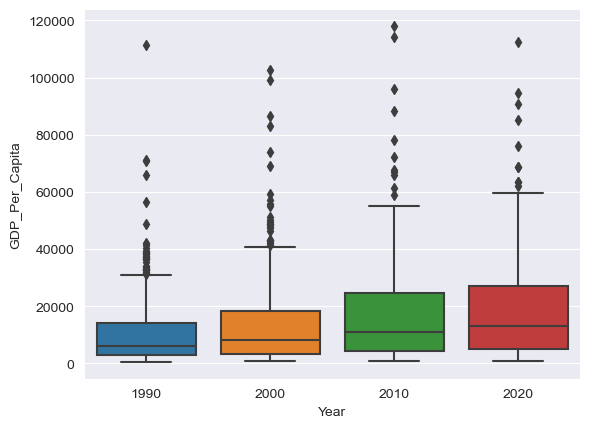

In [38]:
df = gdp_decades
sns.boxplot(x=df["Year"], y=df["GDP_Per_Capita"])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

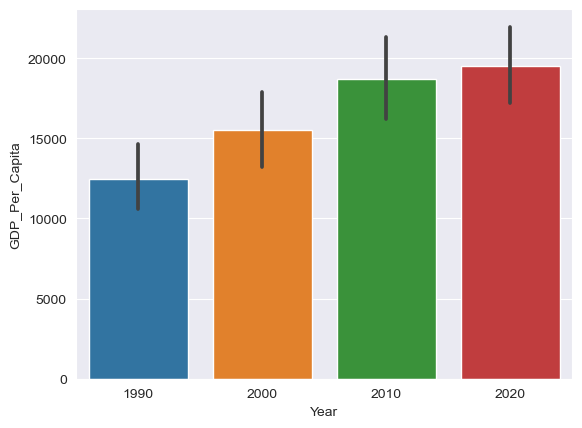

In [39]:
df = gdp_decades
sns.barplot(x=df["Year"], y=df["GDP_Per_Capita"])

A barplot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

Barplot is sometimes described as a boring way to visualize information. However it is probably the most efficient way to show this kind of data. Ordering bars and providing good annotation are often necessary.

Common Mistakes
Do not confound it with a histogram.
Long labels? Think of an horizontal version.
Sorting bars often add insight.

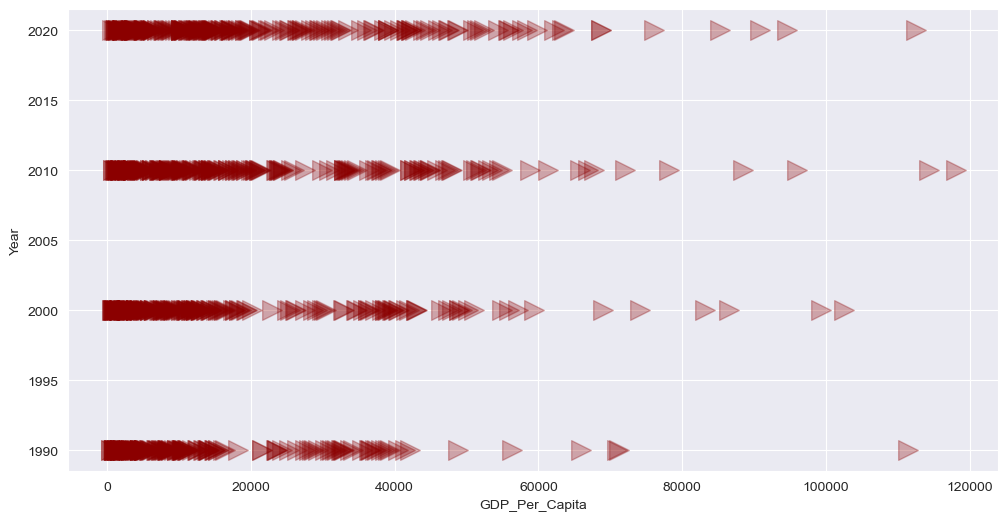

In [40]:
df = gdp_decades
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x=df["GDP_Per_Capita"], y=df["Year"], marker=">", fit_reg=False, scatter_kws={"color":"darkred", "alpha":0.3,"s":200})
plt.show()

A scatterplot displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis

Common Mistakes
Overplotting is the most common mistake when sample size is high.
Don't forget to show subgroups if you have some.

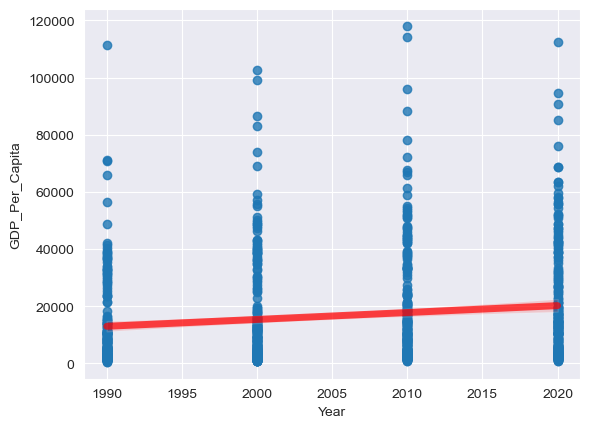

In [41]:
df = gdp_decades
sns.regplot(x=df["Year"], y=df["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

GDP values have been growing over time, however, the mean for a majority of the countries is at or below 20000.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [42]:
gdp_df1
first_gdp_over_100k = gdp_df1[gdp_df1.GDP_Per_Capita > 100000].sort_values(by = 'Year', ascending = True)
first_gdp_over_100k.head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


12a. Which country had the highest GDP per capita in 2020?  Luxembourg, with 111257.309472

In [43]:
maxGDP_2020 = year2020_df.loc[year2020_df['GDP_Per_Capita'].idxmax()]
maxGDP_2020

Country              Luxembourg
GDP_Per_Capita    112557.309472
Name: 3882, dtype: object

In [44]:
largest_GDP_2020 = year2020_df.nlargest(1,['GDP_Per_Capita'])
largest_GDP_2020

,Country,GDP_Per_Capita
3882,Luxembourg,112557.309472


In [45]:
maxGDP_2020 = year2020_df.loc[year2020_df['GDP_Per_Capita'].idxmax()]
maxGDP_2020

Country              Luxembourg
GDP_Per_Capita    112557.309472
Name: 3882, dtype: object

12b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [46]:
lux_df = gdp_decades.loc[gdp_decades['Country'] == 'Luxembourg'].sort_values(by = 'Year', ascending = True)
lux_df

,Country,Year,GDP_Per_Capita
3912,Luxembourg,1990,70860.819124
3902,Luxembourg,2000,99301.526999
3892,Luxembourg,2010,114343.988089
3882,Luxembourg,2020,112557.309472


Text(0.5, 1.0, 'Luxembourg GDP Per Capita By Decade Markers')

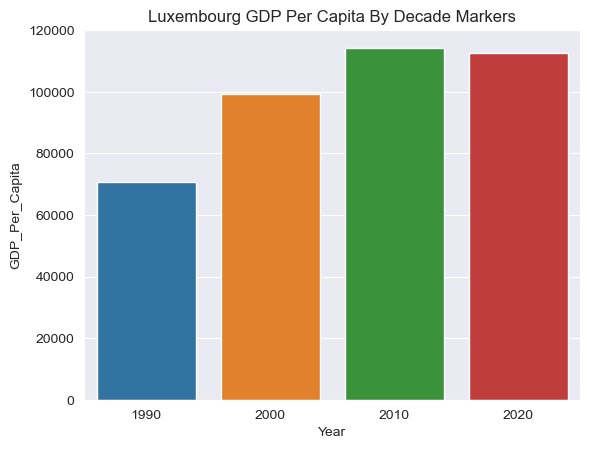

In [47]:
lux_df
sns.barplot(x=lux_df["Year"], y=lux_df["GDP_Per_Capita"])
plt.title('Luxembourg GDP Per Capita By Decade Markers')

Text(0.5, 1.0, 'Luxembourg GDP Per Capita Over Time')

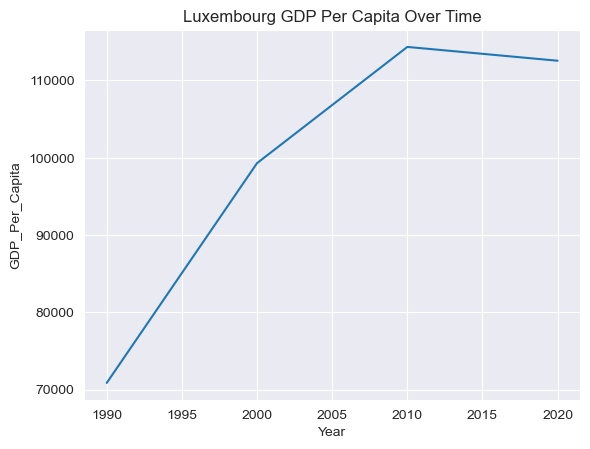

In [48]:
sns.lineplot(x=lux_df["Year"], y=lux_df["GDP_Per_Capita"])
plt.title('Luxembourg GDP Per Capita Over Time')

FANCY LINE
Libraries
library(tidyverse)
library(hrbrthemes)
library(plotly)
library(patchwork)
library(babynames)
library(viridis)

Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)

plot
data %>%
  ggplot( aes(x=date, y=value)) +
    geom_line(color="#69b3a2") +
    ggtitle("Evolution of Bitcoin price") +
    ylab("bitcoin price ($)") +
    theme_ipsum()

CUTTING LINE CHART WITH A DOT
data %>%
  tail(10) %>%
  ggplot( aes(x=date, y=value)) +
    geom_line(color="#69b3a2") +
    geom_point(color="#69b3a2", size=4) +
    ggtitle("Cuting") +
    ylab("bitcoin price ($)") +
    theme_ipsum()

LOLLIPOP import pandas as pd
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

Make the plot
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])

In [49]:
lux_df2 = gdp_df1.loc[gdp_df1['Country'] == 'Luxembourg'].sort_values(by = 'Year', ascending = True)
lux_df2

,Country,Year,GDP_Per_Capita
3912,Luxembourg,1990,70860.819124
3911,Luxembourg,1991,75961.668717
3910,Luxembourg,1992,76323.304753
3909,Luxembourg,1993,78468.921760
3908,Luxembourg,1994,80365.224508
3907,Luxembourg,1995,80379.127629
3906,Luxembourg,1996,80401.032017
3905,Luxembourg,1997,83702.813530
3904,Luxembourg,1998,88185.800110
3903,Luxembourg,1999,94115.384035


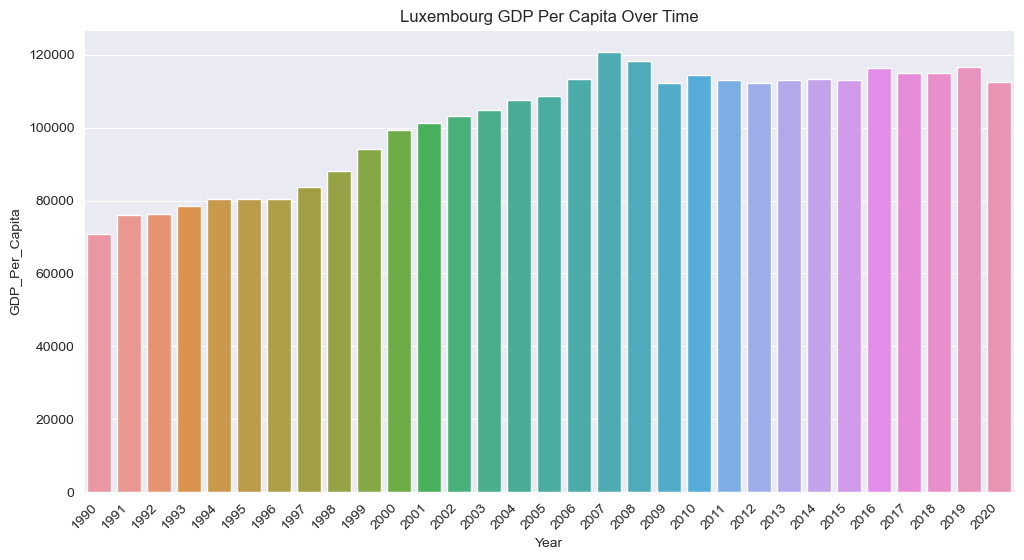

In [50]:
df = lux_df2
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df["Year"], y=df["GDP_Per_Capita"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Luxembourg GDP Per Capita Over Time')
plt.show()

13a. Which country had the lowest GDP per capita in 2020? Burundi, with 731.064074

In [51]:
minGDP_2020 = year2020_df.loc[year2020_df['GDP_Per_Capita'].idxmin()]
minGDP_2020

Country              Burundi
GDP_Per_Capita    731.064074
Name: 914, dtype: object

In [52]:
smallest_GDP_2020 = year2020_df.nsmallest(1,['GDP_Per_Capita'])
smallest_GDP_2020 

,Country,GDP_Per_Capita
914,Burundi,731.064074


13b. Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [53]:
gdp_decades
bur_df = gdp_decades.loc[gdp_decades['Country'] == 'Burundi'].sort_values(by = 'Year', ascending = True)
bur_df

,Country,Year,GDP_Per_Capita
944,Burundi,1990,1184.842032
934,Burundi,2000,828.000479
924,Burundi,2010,846.169112
914,Burundi,2020,731.064074


Text(0.5, 1.0, 'Burundi GDP Per Capita By Decade Markers')

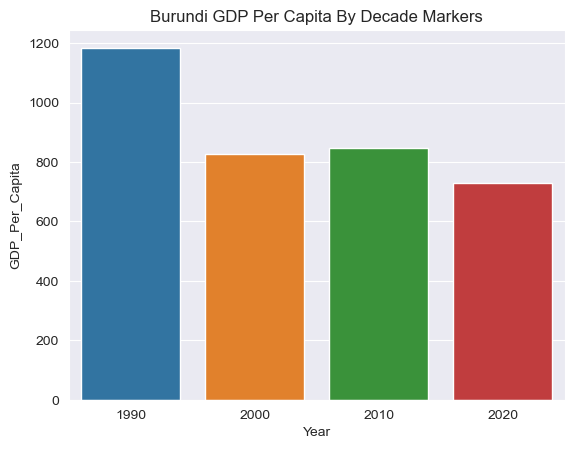

In [54]:
sns.barplot(x=bur_df["Year"], y=bur_df["GDP_Per_Capita"])
plt.title('Burundi GDP Per Capita By Decade Markers')

Text(0.5, 1.0, 'Luxembourg GDP Per Capita By Decade Markers')

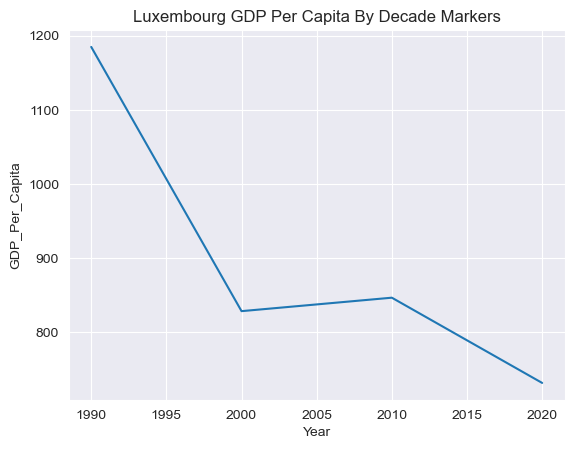

In [55]:
sns.lineplot(x=bur_df["Year"], y=bur_df["GDP_Per_Capita"])
plt.title('Luxembourg GDP Per Capita By Decade Markers')

In [56]:
bur_df2 = gdp_df1.loc[gdp_df1['Country'] == 'Burundi']
bur_df2

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


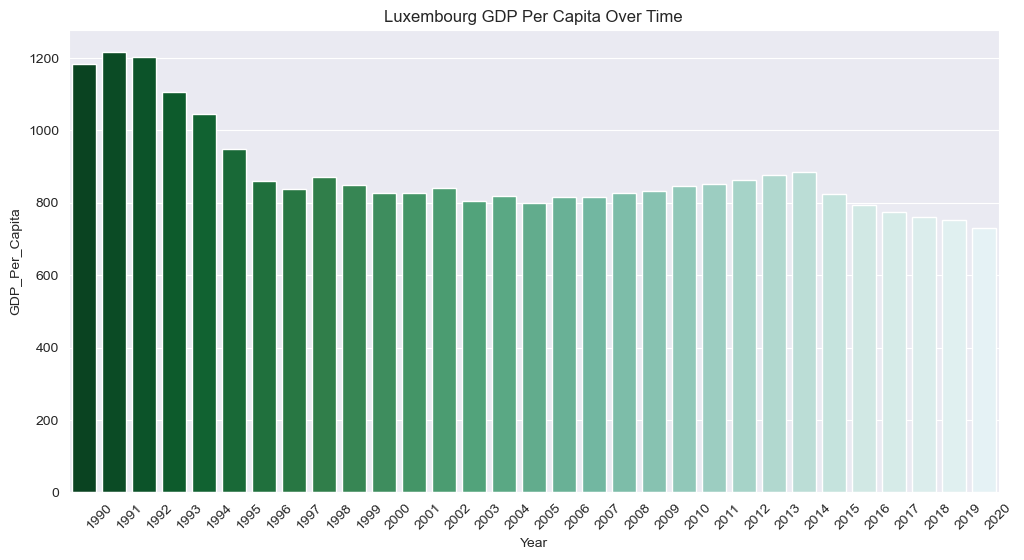

In [57]:
df = bur_df2
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=df["Year"], y=df["GDP_Per_Capita"], palette=sns.color_palette("BuGn_r", n_colors=len(bur_df2) + 4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='left')
plt.title('Luxembourg GDP Per Capita Over Time')
plt.show()

13. **Bonus question:** Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [117]:
bonus = gdp_decades.loc[(gdp_decades["Year"] == 1990) |
                        (gdp_decades["Year"] == 2020)].sort_values(by = ('Country'), ascending = True)
bonus

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129
...,...,...,...
7113,World,1990,9704.621768
7114,Zambia,2020,3277.816510
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461


* Come back to this

Reorder this data frame
df = df.sort_values(['value'], ascending=False).reset_index(drop=True)

gdp_decades
first_gdp_over_100k = gdp_df1[gdp_df1.GDP_Per_Capita > 100000].sort_values(by = 'Year', ascending = True)
first_gdp_over_100k.head(1)

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [58]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [59]:
int_df = internet_df.drop(columns = 'Value Footnotes')
int_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [60]:
int_df = int_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
int_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [61]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [62]:
int_df.describe()

,Year,Internet_Users_Pct
count,4495.000000,4495.000000
mean,2002.732814,18.675495
std,7.856270,25.091999
min,1960.000000,0.000000
25%,1998.000000,0.346593
50%,2003.000000,5.265683
75%,2009.000000,30.581020
max,2014.000000,98.160000


16. Look at the number of observations in this dataset per year. What do you notice?

In [64]:
int_df.Year.value_counts()[int_df.Year.unique()]

2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
1990    210
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: Year, dtype: int64

In [66]:
len(int_df.Year.value_counts())

43

Dispersion chart?

17. What is the first year to have a non-zero internet users percentage value? 1990

In [68]:
non_zero_int_pct = int_df.loc[int_df['Internet_Users_Pct'] > 0.0]
non_zero_int_pct.shape

(4106, 3)

In [69]:
non_zero_int_pct = int_df.loc[int_df['Internet_Users_Pct'] > 0.0]
non_zero_int_pct

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684


In [70]:
non_zero_int_pct['Year'].min()

1990

In [74]:
min_year = non_zero_int_pct.loc[non_zero_int_pct['Year'] == 1990]
min_year

,Country,Year,Internet_Users_Pct
204,Australia,1990,0.585095
229,Austria,1990,0.130369
375,Belgium,1990,0.001007
728,Canada,1990,0.361000
1107,Denmark,1990,0.097277
1388,Finland,1990,0.401088
1413,France,1990,0.052778
1535,Germany,1990,0.125892
2023,Israel,1990,0.110774
2048,Italy,1990,0.017545


In [75]:
int_df.loc[int_df['Year'] == 1989]

,Country,Year,Internet_Users_Pct
516,Botswana,1989,0.0
648,Burundi,1989,0.0
1646,Grenada,1989,0.0
2541,Maldives,1989,0.0
2879,Nepal,1989,0.0
3900,Syria,1989,0.0
4001,Thailand,1989,0.0
4056,Togo,1989,0.0


Try iteration and a custom function on this Q?

18. How does the distribution of internet users percent differ for 2000 and 2014?

In 2000, the majority of countries had little to no usage, up to about 50% at most.  
By 2014, internet usage is widespread fairly evenly across the spectrum, with a few spikes around 15% and 40%

In [77]:
distribution_df = int_df.loc[(int_df['Year'] == 2000) | (int_df['Year'] == 2014)]
distribution_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


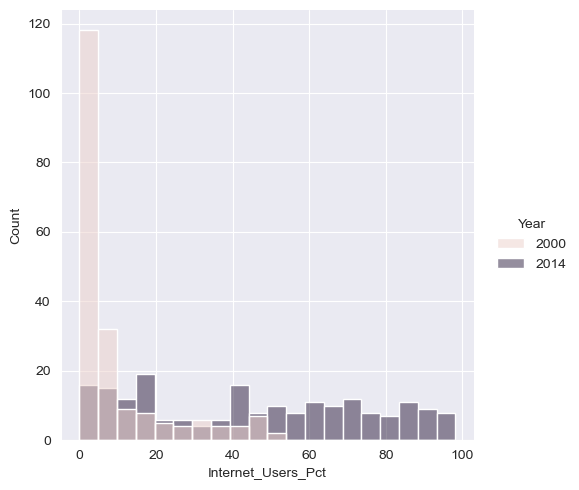

In [78]:
sns.displot(distribution_df, x="Internet_Users_Pct", hue="Year", bins=20)

19. For how many countries was the percentage of internet users below 5% in 2014?  16 countries.

In [79]:
under_five = int_df.loc[(int_df['Internet_Users_Pct'] < 5.00)]
under_five

,Country,Year,Internet_Users_Pct
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [81]:
usage_2014 = under_five[(under_five['Year'] == 2014)].sort_values(by = 'Internet_Users_Pct', ascending = False)
usage_2014

,Country,Year,Internet_Users_Pct
3956,Tanzania,2014,4.86
762,Central African Rep.,2014,4.03
2453,Madagascar,2014,3.70
1742,Guinea-Bissau,2014,3.32
909,Congo (Democratic Republic of the),2014,3.00
1299,Ethiopia,2014,2.90
782,Chad,2014,2.50
2814,Myanmar,2014,2.10
3533,Sierra Leone,2014,2.10
2975,Niger,2014,1.95


In [82]:
len(usage_2014.value_counts())

16

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [104]:
gdp_df1.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [84]:
gdp_df2 = gdp_df1.copy()
gdp_df2

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [85]:
gdp_df2.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [86]:
gdp_df2['Year'] = pd.to_datetime(gdp_df2['Year'], format='%Y')
gdp_df2

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020-01-01,1970.560169
1,Afghanistan,2019-01-01,2065.036235
2,Afghanistan,2018-01-01,2033.804389
3,Afghanistan,2017-01-01,2058.400221
4,Afghanistan,2016-01-01,2057.067978
...,...,...,...
7171,Zimbabwe,1994-01-01,2603.927369
7172,Zimbabwe,1993-01-01,2420.092791
7173,Zimbabwe,1992-01-01,2437.152908
7174,Zimbabwe,1991-01-01,2733.696626


In [87]:
gdp_df2.dtypes

Country                   object
Year              datetime64[ns]
GDP_Per_Capita           float64
dtype: object

In [88]:
int_df2 = int_df.copy()
int_df2

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [89]:
int_df2.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [90]:
int_df2['Year'] = pd.to_datetime(int_df2['Year'], format='%Y')
int_df2

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014-01-01,6.390000
1,Afghanistan,2013-01-01,5.900000
2,Afghanistan,2012-01-01,5.454545
3,Afghanistan,2011-01-01,5.000000
4,Afghanistan,2010-01-01,4.000000
...,...,...,...
4490,Zimbabwe,1997-01-01,0.033080
4491,Zimbabwe,1996-01-01,0.016790
4492,Zimbabwe,1995-01-01,0.007684
4493,Zimbabwe,1994-01-01,0.001739


In [91]:
int_df2.dtypes

Country                       object
Year                  datetime64[ns]
Internet_Users_Pct           float64
dtype: object

In [92]:
gdp_and_internet_use = pd.merge(gdp_df2, int_df2, how='outer', on=['Country','Year'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020-01-01,1970.560169,NaN
1,Afghanistan,2019-01-01,2065.036235,NaN
2,Afghanistan,2018-01-01,2033.804389,NaN
3,Afghanistan,2017-01-01,2058.400221,NaN
4,Afghanistan,2016-01-01,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999-01-01,NaN,0.056629
8252,Yemen,1998-01-01,NaN,0.023323
8253,Yemen,1997-01-01,NaN,0.015025
8254,Yemen,1996-01-01,NaN,0.000621


In [93]:
gdp_and_internet_use.shape

(8256, 4)

21a. Find the three countries with the highest internet users percentage in 2014. 

In [94]:
countries_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == '2014-01-01']
countries_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014-01-01,2102.384604,6.39
25,Africa Eastern and Southern,2014-01-01,3677.319414,NaN
56,Africa Western and Central,2014-01-01,4215.646000,NaN
87,Albania,2014-01-01,11586.833878,60.10
118,Algeria,2014-01-01,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014-01-01,NaN,51.04
8170,Venezuela,2014-01-01,NaN,57.00
8194,Viet Nam,2014-01-01,NaN,48.31
8214,Virgin Islands (U.S.),2014-01-01,NaN,50.07


In [95]:
countries_2014.nlargest(3, 'Internet_Users_Pct')                       

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014-01-01,50450.741612,98.16
645,Bermuda,2014-01-01,77361.104881,96.80
4880,Norway,2014-01-01,62390.130313,96.30


21b. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [97]:
top_three_2014 = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland')|
                                          (gdp_and_internet_use['Country'] == 'Bermuda')|
                                          (gdp_and_internet_use['Country'] == 'Norway')]
top_three_2014                                                            

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020-01-01,76105.138057,NaN
640,Bermuda,2019-01-01,81681.726668,NaN
641,Bermuda,2018-01-01,81423.408453,NaN
642,Bermuda,2017-01-01,81834.955874,NaN
643,Bermuda,2016-01-01,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994-01-01,NaN,6.794812
7671,Iceland,1993-01-01,NaN,2.667825
7672,Iceland,1992-01-01,NaN,1.539160
7673,Iceland,1991-01-01,NaN,0.505129


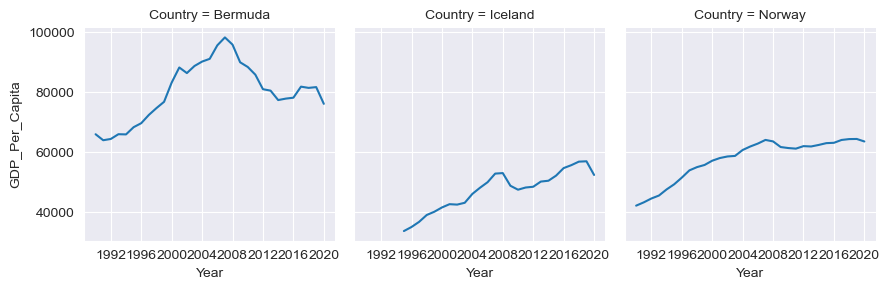

In [103]:
g = sns.FacetGrid(top_three_2014, col="Country")
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


int_df1.ne(0).idxmax()

df['Year'] = df['Original'].astype(str).astype('datetime64')
print(df)

df['Year'] = pd.to_datetime(df['Year'], format='%Y') 
print (df)

gdp_df1['Year'] = pd.to_datetime(gdp_df1['Year'])
gdp_df1.dtypes

convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date']) 

raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

WAYS TO DROP ROWS
Number of rows to drop
n = 3
df.drop(df.tail(n).index,
        inplace = True)
print(df)

n = 2
df.drop(df.groupby(['a','b']).tail(n).index, axis=0)

n = 3
df_dropped_last_n = df.iloc[:-n]
print(df_dropped_last_n)

importing pandas module 
import pandas as pd 
    
importing numpy module 
import numpy as np 
    
creating list
list =[1, 0, 12, 1, 0, 4, 22, 0, 3, 9]
  
creating series
series = pd.Series(list)
  
calling .nonzero() method
result = series.nonzero()
  
display
print(result)
  
retrieving values using iloc method
values = series.iloc[result]
  
display
values

with pd.option_context('display.max_rows', None,
                        'display.max_columns', None,
                          'display.precision', 4,
                      ):
    print(int_df1)

CHERNAE'S CODE FOR MAX
max_year = gdp_df1['Year'].max()
max_year

https://sparkbyexamples.com/pandas/pandas-find-row-values-for-column-maximal/
Below are some quick examples.
Using DataFrame.idxmax() Method.
df2=df['Fee'].idxmax()

Using DataFrame.loc[] property.
df2=df.loc[df['Fee'].idxmax()]

The idxmax() method returns a Series with the index of the maximum value for each column. By specifying the column axis ( axis='columns' ), the idxmax() method returns a Series with the index of the maximum value for each row.

Using DataFrame.query() method.
df2=df.query('Fee == Fee.max()')

#Using DataFrame.nlargest() function.
df2=df.nlargest(2,['Fee'])

Using DataFrame.nsmallest() function.
df2=df.nsmallest(2,['Fee'])
n=180
int_df1 = int_df.iloc[:-n]